In [1852]:
#!pip install imblearn --user  
#uncomment below only if imblearn is not installed 

#restart Jupyter engine again is still fails to import imblearn

In [1853]:
# Importing the required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import pprint

from imblearn.over_sampling import SMOTE 
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [1854]:
#Function to perform GridSearch for LR
def gridSearchForLR(LRModel,X_train,y_train):
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
    logreg_cv=GridSearchCV(LRModel,grid,cv=10)
    logreg_cv.fit(X_train, y_train)

    print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
    print("accuracy :",logreg_cv.best_score_)

In [1855]:
#function to print impr features in a model
def impFeaturesforModels(importance):
    importancePerFeature = sorted(dict(zip(X_train.columns, importance)).items(),key=operator.itemgetter(1),reverse=True)
    pprint.pprint(importancePerFeature, width=1)

In [1856]:
#function to get confusion metric parameters printed

def printingConfusionMetricDetails(confusion_metric):
    TP = confusion_metric[1,1] # true positive 
    TN = confusion_metric[0,0] # true negatives
    FP = confusion_metric[0,1] # false positives
    FN = confusion_metric[1,0] # false negatives

    print('Acuracy Score', accuracy_score(y_test,y_pred_default))
    print('Sensitivity: ', TP / float(TP+FN))
    print('Specificity: ',TN / float(TN+FP))
    print('false postive rate: ',FP/ float(TN+FP))
    print('positive predictive value: ', TP / float(TP+FP))
    print('Negative predictive value: ',TN / float(TN+ FN))
    print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

In [1857]:
#function to print
def printingMSEandRsquare(y_test, y_pred):
    mean_square_err = mean_squared_error(y_test, y_pred)
    r_square = r2_score(y_test, y_pred)
    print(mean_square_err)
    print(r_square)

In [1858]:
def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

In [1859]:
data = pd.read_csv("telecom_churn_data.csv", sep=',', encoding='ISO-8859-1')

In [1860]:
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [1861]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [1862]:
data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [1863]:
#drop mobile number  - the number is not needed for any calculation or analysis
data.drop('mobile_number',axis=1,inplace=True)

In [1864]:
#check for missing values
data.isna().sum()

circle_id                  0
loc_og_t2o_mou          1018
std_og_t2o_mou          1018
loc_ic_t2o_mou          1018
last_date_of_month_6       0
                        ... 
aon                        0
aug_vbc_3g                 0
jul_vbc_3g                 0
jun_vbc_3g                 0
sep_vbc_3g                 0
Length: 225, dtype: int64

In [1865]:
#Missing value percencentages
missing_values = pd.DataFrame((data.isnull().sum()/len(data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

feature   Missing%
188           arpu_3g_6  74.846748
176  av_rech_amt_data_6  74.846748
216           fb_user_6  74.846748
196    night_pck_user_6  74.846748
160   total_rech_data_6  74.846748
..                  ...        ...
145      max_rech_amt_7   0.000000
144      max_rech_amt_6   0.000000
143    total_rech_amt_9   0.000000
142    total_rech_amt_8   0.000000
224          sep_vbc_3g   0.000000

[225 rows x 2 columns]

In [1866]:
#Dropping columns where null are more than 95%
data = data.loc[:, data.isnull().mean() < .95]


In [1867]:
# DATA IMPUTATION

In [1868]:
#We can also use MICE imputation 
#data imputation for categorical columns (fb and nigh pack users) as -1
data=data.fillna({'fb_user_6':-1,'fb_user_7':-1,'fb_user_8':-1})
data=data.fillna({'night_pck_user_6':-1,'night_pck_user_7':-1,'night_pck_user_8':-1})
#data imputation for non categorical as 0 which means no recharge happened
data=data.fillna(0)

In [1869]:
#verifying imputation and null
data.isna().sum()

circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
                       ..
aon                     0
aug_vbc_3g              0
jul_vbc_3g              0
jun_vbc_3g              0
sep_vbc_3g              0
Length: 225, dtype: int64

In [1870]:
#Missing value percencentages
missing_values = pd.DataFrame((data.isnull().sum()/len(data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

feature  Missing%
0           circle_id       0.0
113  std_ic_t2o_mou_7       0.0
143  total_rech_amt_9       0.0
144    max_rech_amt_6       0.0
145    max_rech_amt_7       0.0
..                ...       ...
79        og_others_9       0.0
80     total_og_mou_6       0.0
81     total_og_mou_7       0.0
82     total_og_mou_8       0.0
224        sep_vbc_3g       0.0

[225 rows x 2 columns]

In [1871]:
## No missing values now 
##Renaming columns to get them inline with month codes
data =data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7',
                           'aug_vbc_3g': 'vbc_3g_8','sep_vbc_3g': 'vbc_3g_9'})

In [1872]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 225 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               floa

In [1873]:
data.shape

(99999, 225)

In [1874]:
#Deriving Features - 
data['amt_data_6'] = data.total_rech_amt_6 + data.total_rech_data_6           
data['amt_data_7'] = data.total_rech_amt_7 + data.total_rech_data_7
data['amt_data_8'] = data.total_rech_amt_8 + data.total_rech_data_8

#  average recharge by customer in June and July
data['avg_amt_data_6_7'] = (data.amt_data_6 + data.amt_data_7)/2

#Retaining customers whose recharge amount is >= 70th percentile amount

data_filtered = data.loc[data.avg_amt_data_6_7 >= data.avg_amt_data_6_7.quantile(0.7), :]
data_filtered = data_filtered.reset_index(drop=True)
data_filtered.shape

(30019, 229)

In [1875]:
data_filtered["last_date_of_month_6"] = pd.to_datetime(data_filtered["last_date_of_month_6"])
data_filtered["last_date_of_month_7"] = pd.to_datetime(data_filtered["last_date_of_month_7"])
data_filtered["last_date_of_month_8"] = pd.to_datetime(data_filtered["last_date_of_month_8"])
data_filtered["date_of_last_rech_6"] = pd.to_datetime(data_filtered["date_of_last_rech_6"])
data_filtered["date_of_last_rech_7"] = pd.to_datetime(data_filtered["date_of_last_rech_7"])
data_filtered["date_of_last_rech_8"] = pd.to_datetime(data_filtered["date_of_last_rech_8"])

#3 new columns for days since recharge.
data_filtered["days_since_recharge_6"] = data_filtered["last_date_of_month_6"] - data_filtered["date_of_last_rech_6"]
data_filtered["days_since_recharge_7"] = data_filtered["last_date_of_month_7"] - data_filtered["date_of_last_rech_7"]
data_filtered["days_since_recharge_8"] = data_filtered["last_date_of_month_8"] - data_filtered["date_of_last_rech_8"]

#converting into days
data_filtered["days_since_recharge_6"] = data_filtered["days_since_recharge_6"].dt.days
data_filtered["days_since_recharge_7"] = data_filtered["days_since_recharge_7"].dt.days
data_filtered["days_since_recharge_8"] = data_filtered["days_since_recharge_8"].dt.days

date_columns_to_be_dropped = ["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8", 
                              "date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8",
                              "date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8"]
data_filtered = data_filtered.drop(columns=date_columns_to_be_dropped)
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30019 entries, 0 to 30018
Data columns (total 223 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               f

In [1876]:
#before outlier
data_filtered.shape

(30019, 223)

In [1877]:
# HANDLING OUTLIERS
#z_scores = stats.zscore(data_filtered)

#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#data_filtered = data_filtered[filtered_entries]

#Using Quantile method ##method is removing all churn_flag=1 rows
Q1 = data_filtered.quantile(0.01)
Q3 = data_filtered.quantile(0.99)
IQR = Q3 - Q1


data_filtered = data_filtered[~((data_filtered < (Q1 - 1.5 * IQR)) |(data_filtered > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26682 entries, 0 to 30018
Data columns (total 223 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               f

In [1878]:
#after outlier treatment
data_filtered.shape

(26682, 223)

In [1879]:
#Identifying Churn customers
data_filtered['churn_flag'] = np.where(((data_filtered['total_ic_mou_9'] == 0.00) | (data_filtered['total_og_mou_9'] == 0.00))
                            & ((data_filtered['vol_2g_mb_9'] == 0.00) | (data_filtered['vol_3g_mb_9'] == 0.00))
                            , 1, 0)
print(data_filtered['churn_flag'].value_counts())


0    23956
1     2726
Name: churn_flag, dtype: int64


In [1880]:
#Now that every column follows same naming patter drop features related to Churn Phase
data_filtered = data_filtered.drop(data_filtered.filter(regex='_9', axis = 1).columns, axis=1)
#Pls note the dataset is comprising only of numeric features now
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26682 entries, 0 to 30018
Data columns (total 169 columns):
circle_id                int64
loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
l

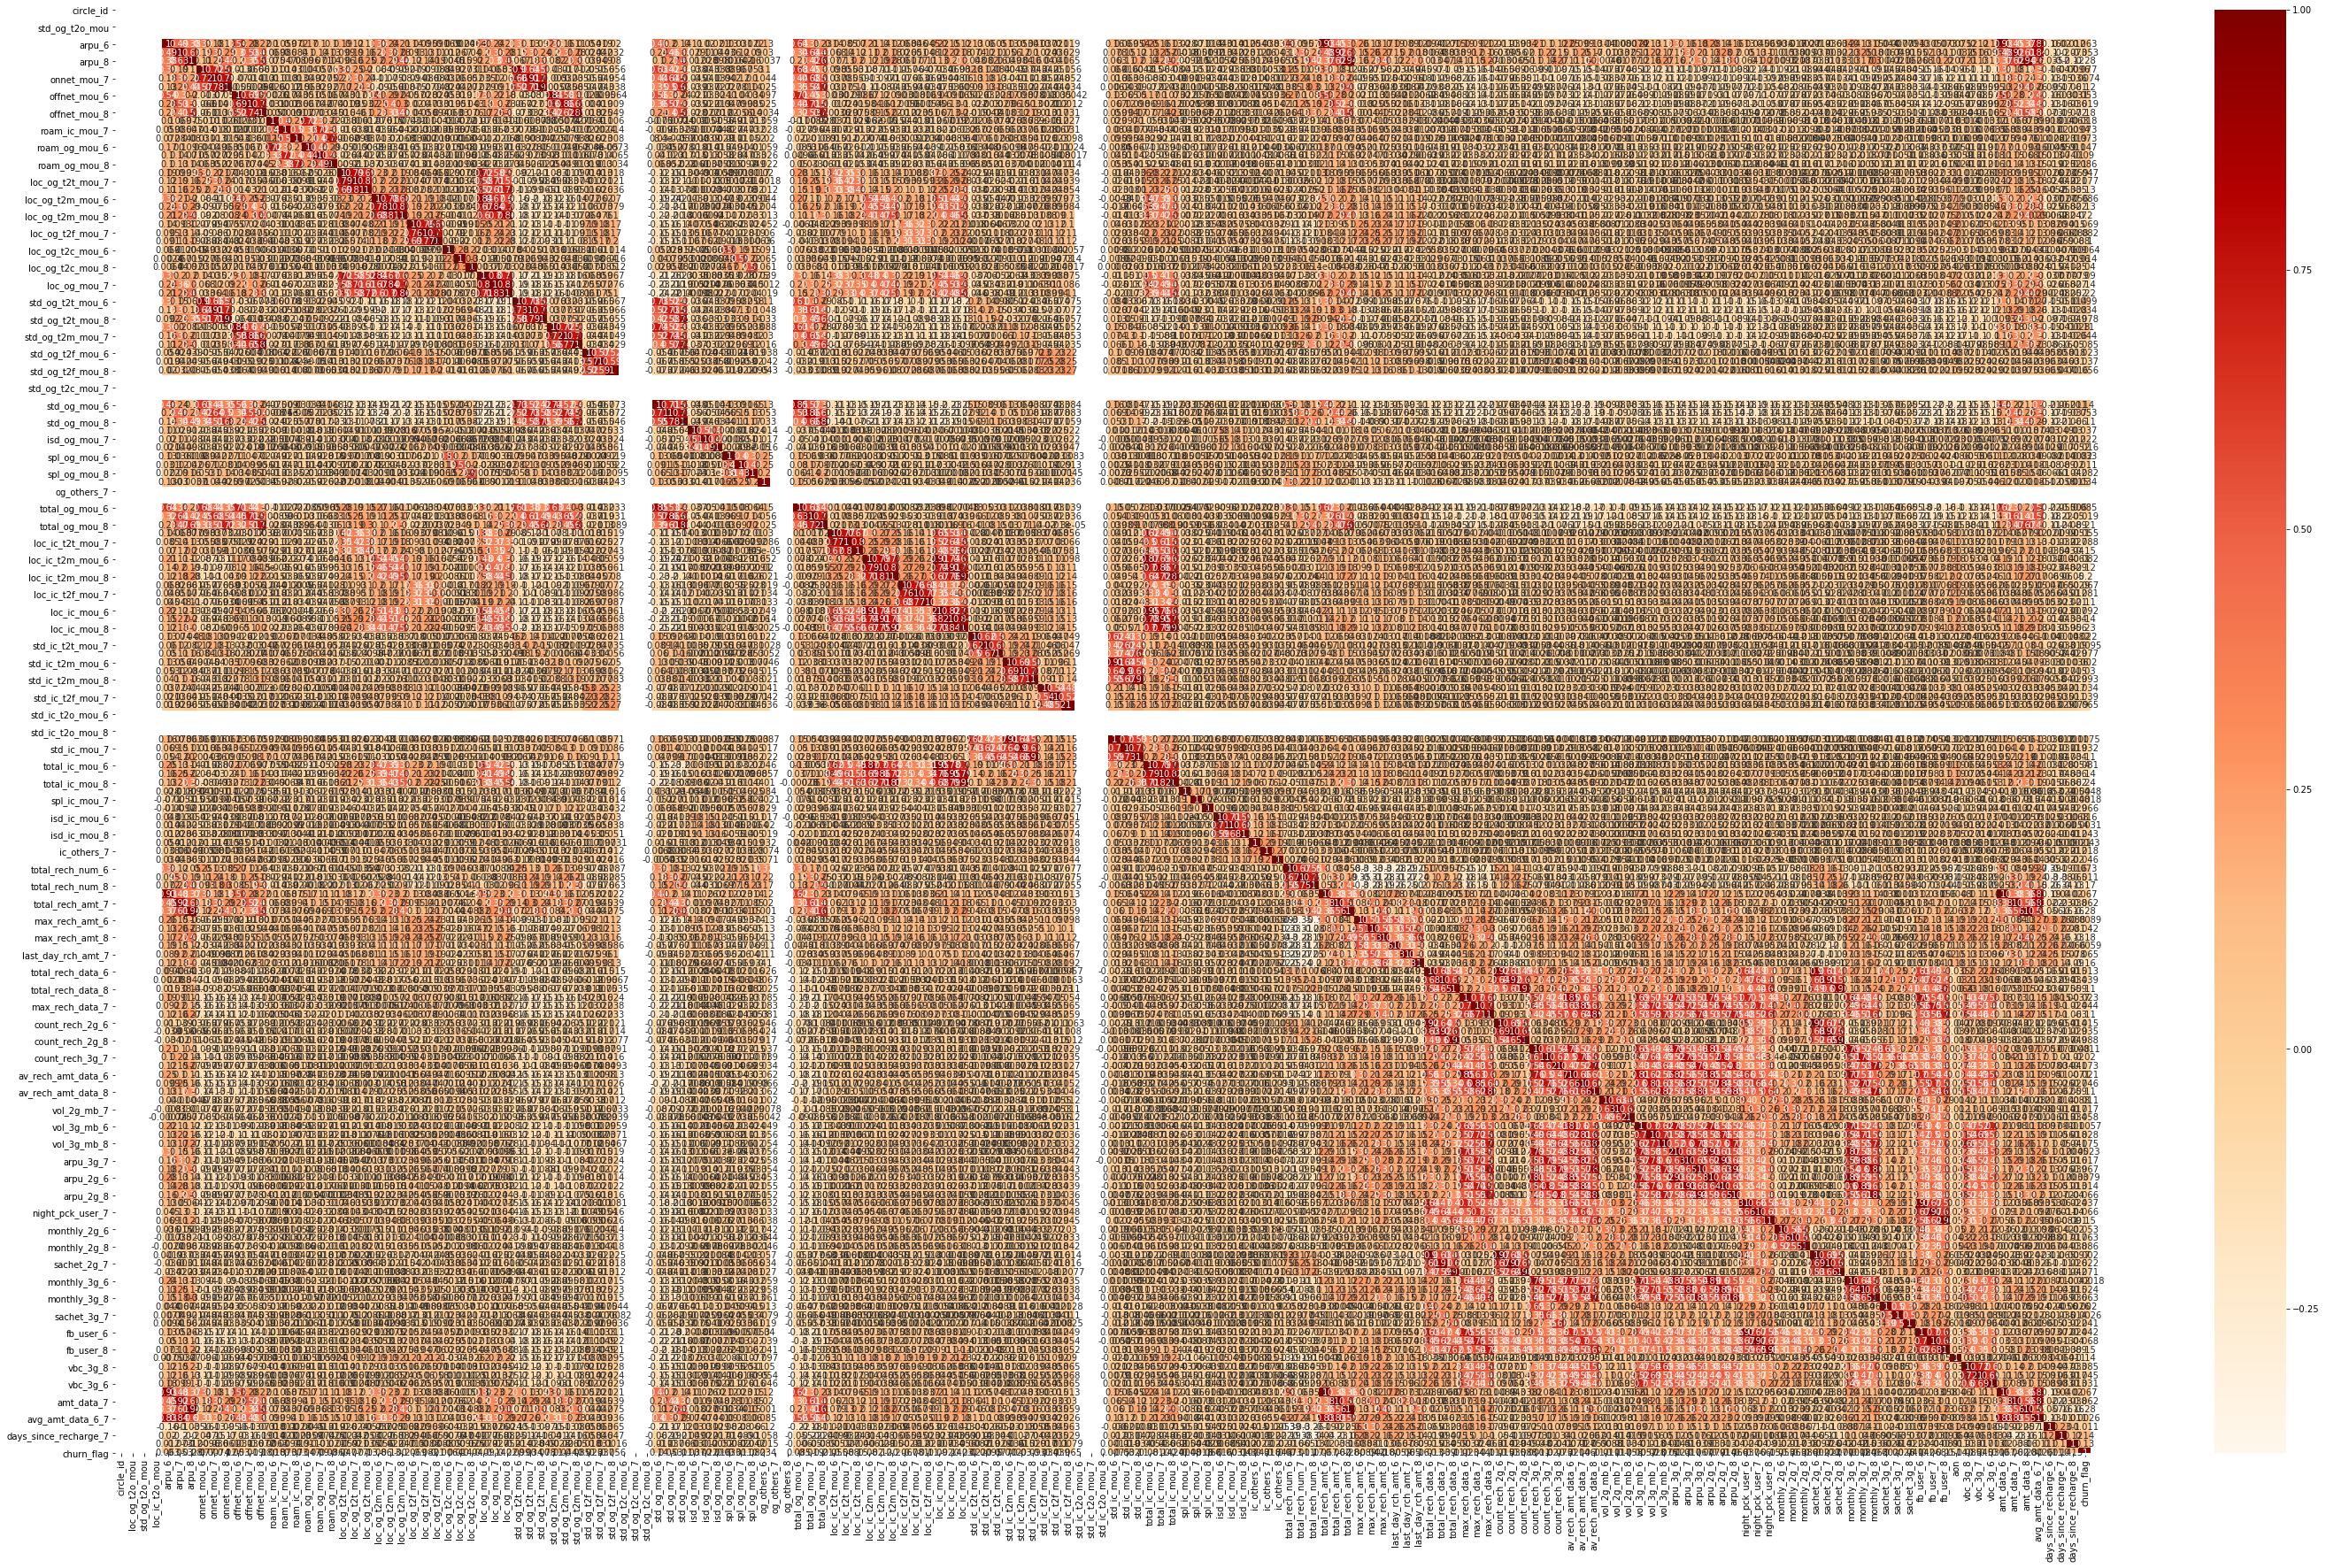

In [1881]:
#Plotting heatmap to get an overall picture
heatmap(50,30,data_filtered)

In [1882]:
## Heatmap is not of much help with large no of features
#Analysing further ..
correlation = data_filtered.corr()
correlation

circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
circle_id                    NaN             NaN             NaN   
loc_og_t2o_mou               NaN             NaN             NaN   
std_og_t2o_mou               NaN             NaN             NaN   
loc_ic_t2o_mou               NaN             NaN             NaN   
arpu_6                       NaN             NaN             NaN   
...                          ...             ...             ...   
avg_amt_data_6_7             NaN             NaN             NaN   
days_since_recharge_6        NaN             NaN             NaN   
days_since_recharge_7        NaN             NaN             NaN   
days_since_recharge_8        NaN             NaN             NaN   
churn_flag                   NaN             NaN             NaN   

                       loc_ic_t2o_mou    arpu_6    arpu_7    arpu_8  \
circle_id                         NaN       NaN       NaN       NaN   
loc_og_t2o_mou                    NaN       NaN       NaN       NaN   
std_og_t2o_mou                    NaN       NaN       NaN       NaN   
loc_ic_t2o_mou                    NaN       NaN       NaN       NaN   
arpu_6                            NaN  1.000000  0.485554  0.381883   
...                               ...       ...       ...       ...   
avg_amt_data_6_7                  NaN  0.825563  0.840374  0.595508   
days_since_recharge_6             NaN -0.164400 -0.102363 -0.034908   
days_since_recharge_7             NaN  0.019534 -0.200261 -0.200625   
days_since_recharge_8             NaN  0.011543 -0.072667 -0.120811   
churn_flag                        NaN  0.063475 -0.052614 -0.275675   

                       onnet_mou_6  onnet_mou_7  onnet_mou_8  ...  vbc_3g_7  \
circle_id                      NaN          NaN          NaN  ...       NaN   
loc_og_t2o_mou                 NaN          NaN          NaN  ...       NaN   
std_og_t2o_mou                 NaN          NaN          NaN  ...       NaN   
loc_ic_t2o_mou                 NaN          NaN          NaN  ...       NaN   
arpu_6                    0.386553     0.177315     0.134430  ...  0.120777   
...                            ...          ...          ...  ...       ...   
avg_amt_data_6_7          0.333686     0.326047     0.255946  ...  0.154896   
days_since_recharge_6    -0.155219    -0.133318    -0.095057  ...  0.090728   
days_since_recharge_7    -0.046521    -0.145110    -0.168430  ...  0.063073   
days_since_recharge_8    -0.009616    -0.036031    -0.061024  ... -0.016555   
churn_flag                0.077044     0.007373    -0.118284  ... -0.044877   

                       vbc_3g_6  amt_data_6  amt_data_7  amt_data_8  \
circle_id                   NaN         NaN         NaN         NaN   
loc_og_t2o_mou              NaN         NaN         NaN         NaN   
std_og_t2o_mou              NaN         NaN         NaN         NaN   
loc_ic_t2o_mou              NaN         NaN         NaN         NaN   
arpu_6                 0.184192    0.927319    0.448181    0.372477   
...                         ...         ...         ...         ...   
avg_amt_data_6_7       0.152900    0.830256    0.833401    0.553349   
days_since_recharge_6  0.088574   -0.193520   -0.022455   -0.056547   
days_since_recharge_7  0.083234    0.039715   -0.228826   -0.164498   
days_since_recharge_8 -0.013465    0.020161   -0.038437   -0.162416   
churn_flag            -0.030923    0.067160   -0.062310   -0.275668   

                       avg_amt_data_6_7  days_since_recharge_6  \
circle_id                           NaN                    NaN   
loc_og_t2o_mou                      NaN                    NaN   
std_og_t2o_mou                      NaN                    NaN   
loc_ic_t2o_mou                      NaN                    NaN   
arpu_6                         0.825563              -0.164400   
...                                 ...                    ...   
avg_amt_data_6_7               1.000000              -0.129382   
days_since_recharge_6  

In [1883]:
#Top 5 correlation
print (correlation['churn_flag'].sort_values(ascending=False)[:6], '\n')

churn_flag               1.000000
std_og_mou_6             0.138610
days_since_recharge_7    0.135460
days_since_recharge_8    0.127538
std_og_t2m_mou_6         0.105027
std_og_t2t_mou_6         0.098548
Name: churn_flag, dtype: float64 



In [1884]:
# Analysis further

In [1885]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = data_filtered
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn_flag",hue="churn_flag",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn_flag",hue="churn_flag",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn_flag",hue="churn_flag",
                showfliers=False,palette=("plasma"))
    plt.show()

In [1886]:
recharge_amnt_columns =  data_filtered.columns[data_filtered.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

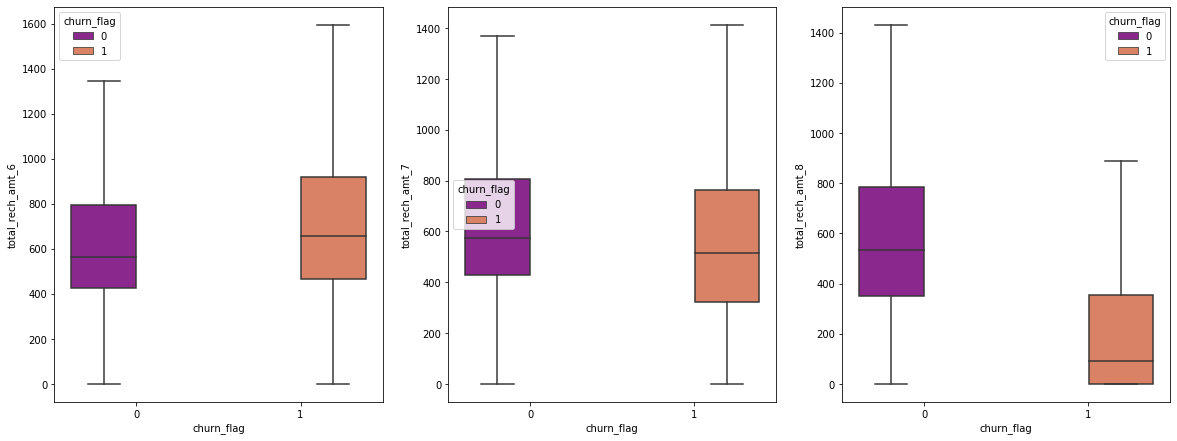

In [1887]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')
#can see a drop in rechargeable amount down in 8th month for churning customers

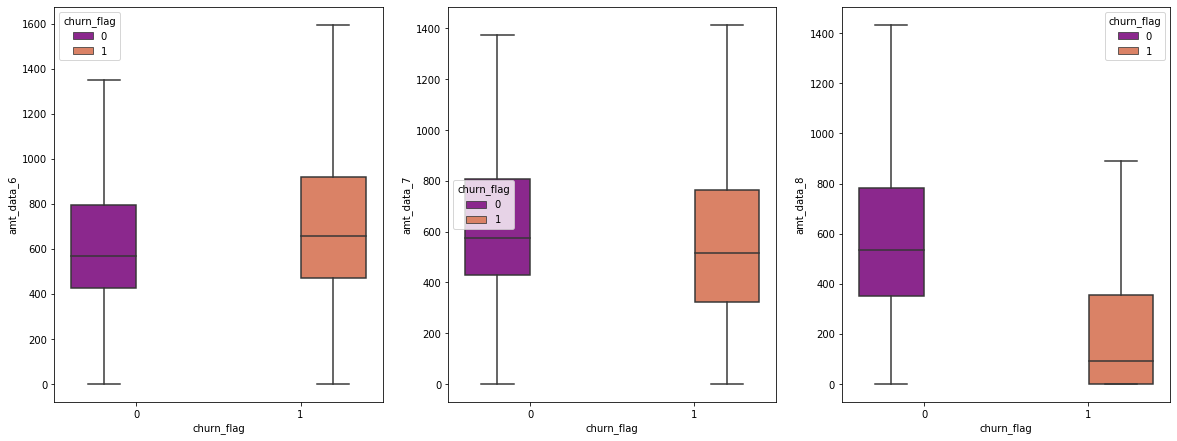

In [1888]:
# Ploting for total recharge amount for data:
plot_box_chart('amt_data')
#recharge amount drops in 8th month for churning customers

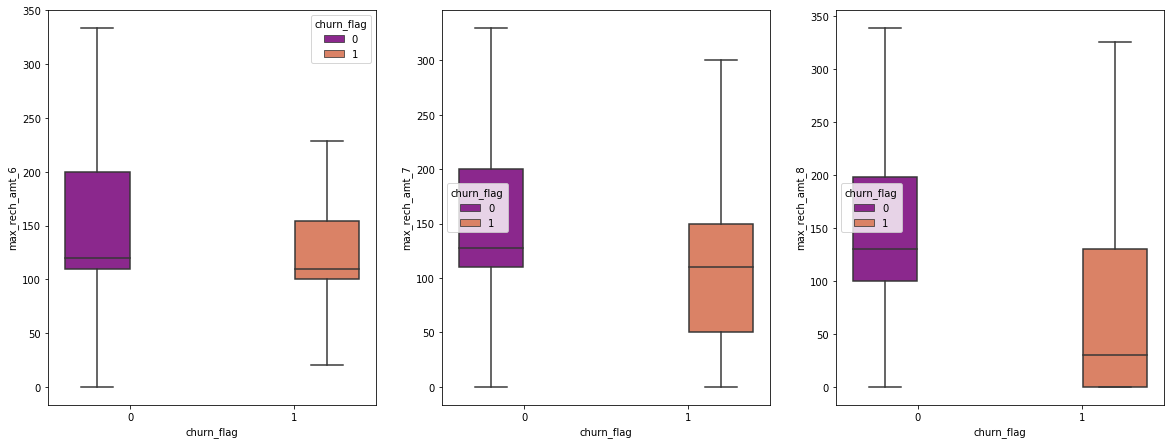

In [1889]:
# Ploting for total recharge amount for data:
plot_box_chart('max_rech_amt')
#Max recharge amount drops in 8th month for churning customers

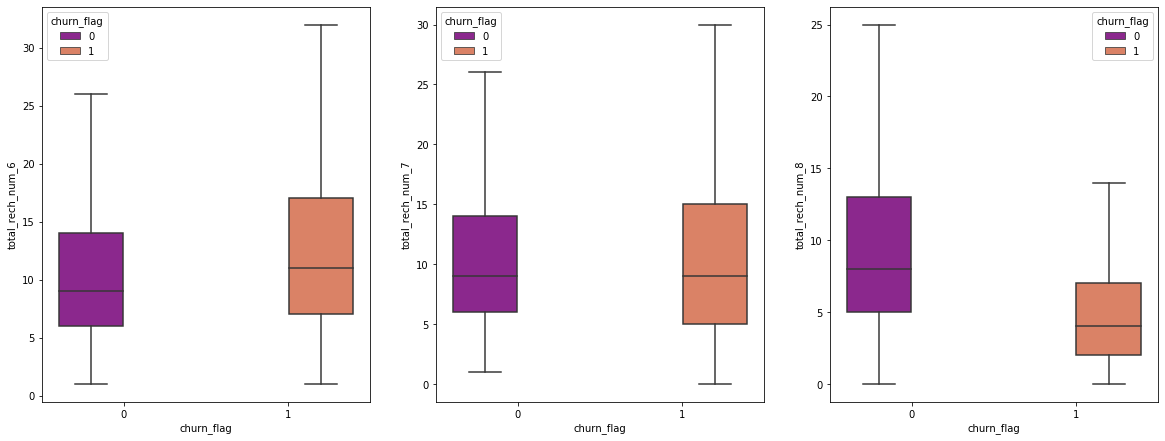

In [1890]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')
#total recharge number drops in 8th month for churning customers

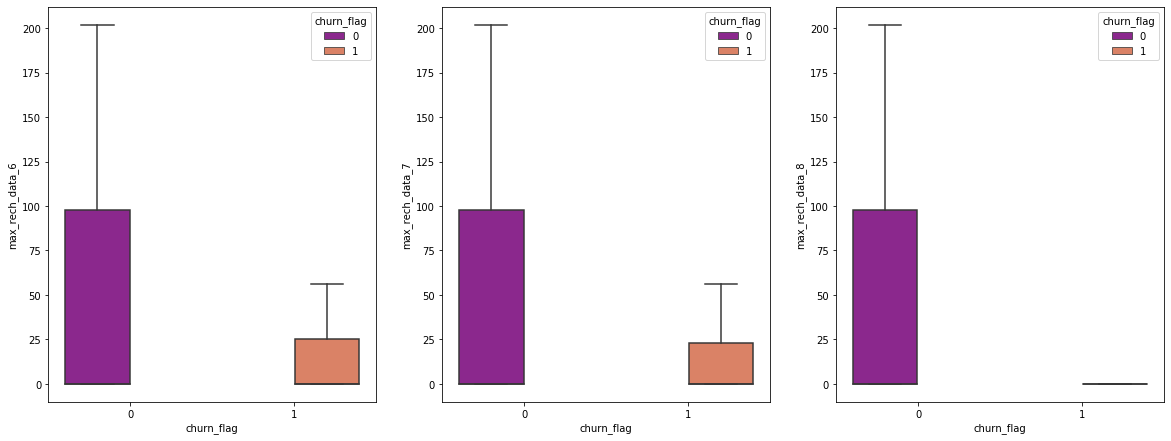

In [1891]:
# Ploting for maximum recharge for data:
plot_box_chart('max_rech_data')
#recharge data is almost going to nill in 8th month for churning customers

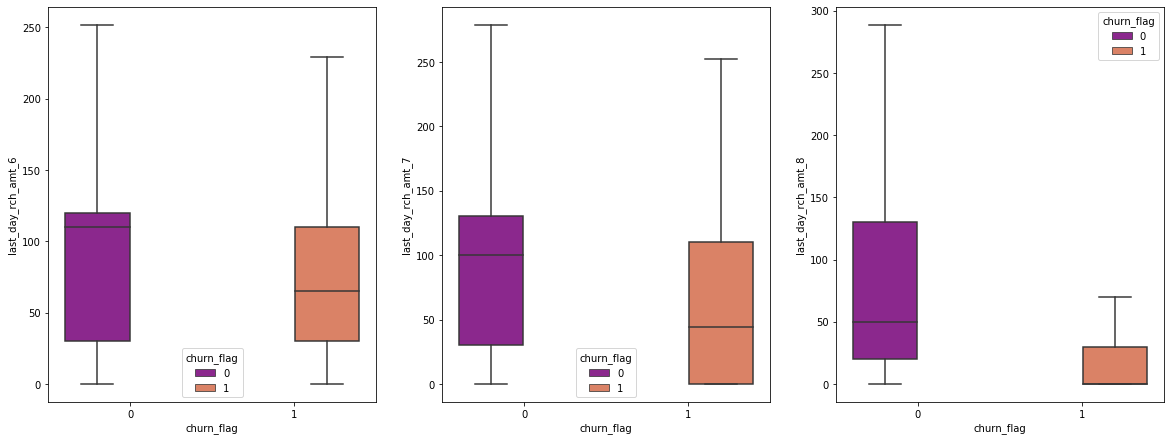

In [1892]:
# Ploting for last day recharge amount:
plot_box_chart('last_day_rch_amt')

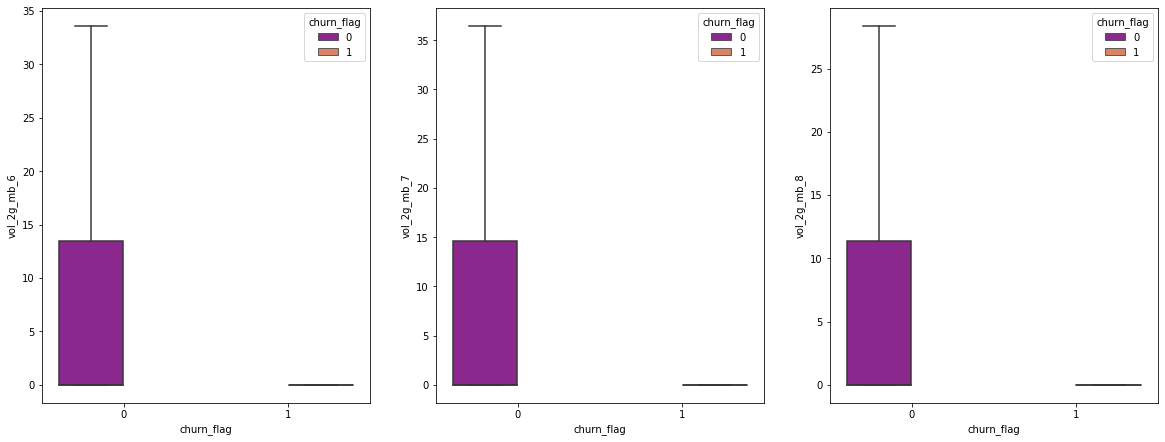

In [1893]:
# Ploting for volume of 2G and 3G usage columns:
plot_box_chart('vol_2g_mb')

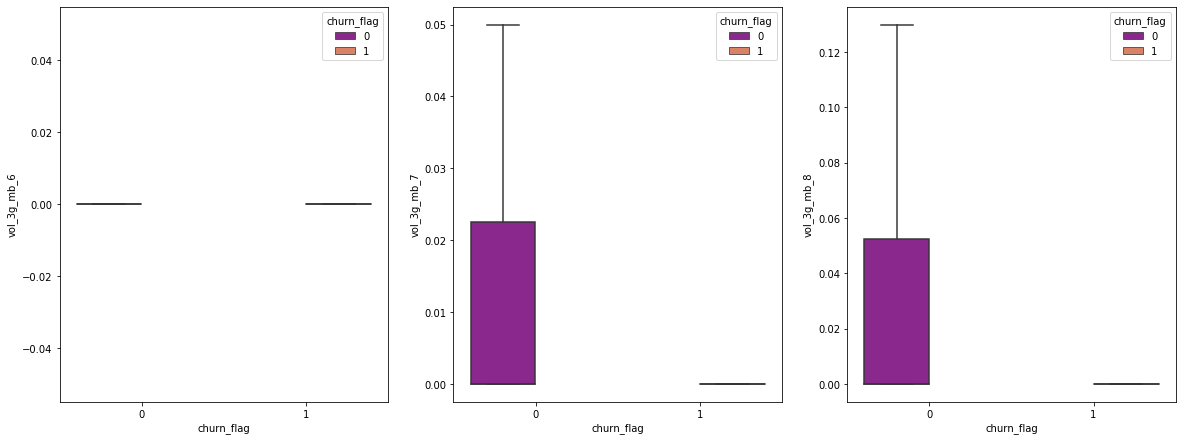

In [1894]:
plot_box_chart('vol_3g_mb')

In [1895]:
mou_og_cols6 = data_filtered.columns[data_filtered.columns.str.contains('.*_og_.*mou_6',regex=True)]

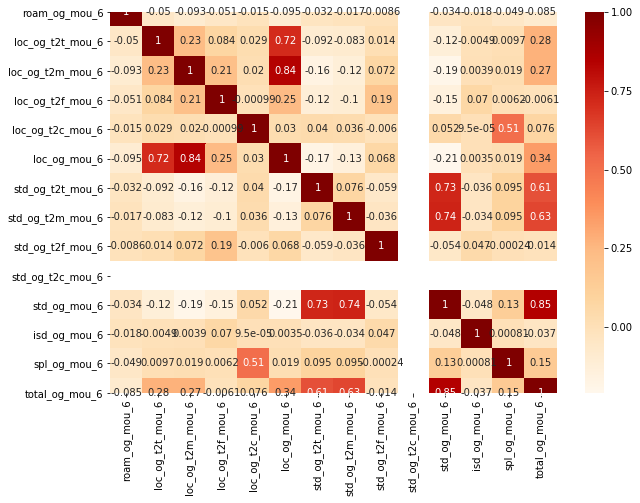

In [1896]:
heatmap(10, 7,data_filtered.filter(mou_og_cols6))

In [1897]:
print(data_filtered.loc[8,'total_og_mou_6'],"==",data_filtered.loc[8,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())
print(data_filtered.loc[8,'std_og_mou_6'],"==",data_filtered.loc[8,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6','std_og_loc_mou_6']].sum())
print(data_filtered.loc[8,'loc_og_mou_6'],"==",data_filtered.loc[8,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_2tc_mou_6']].sum())

337.86 == 337.84999999999997
274.21 == 274.20000000000005
63.64 == 63.64


In [1898]:
list_total_og_cols = data_filtered.columns[data_filtered.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
data_filtered.drop(list_total_og_cols,axis=1,inplace=True)
print("Columns dropped - ")
print(list_total_og_cols.tolist())

Columns dropped - 
['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']


In [1899]:
mou_ic_cols6 = data_filtered.columns[data_filtered.columns.str.contains('.*_ic_.*mou_6',regex=True)]

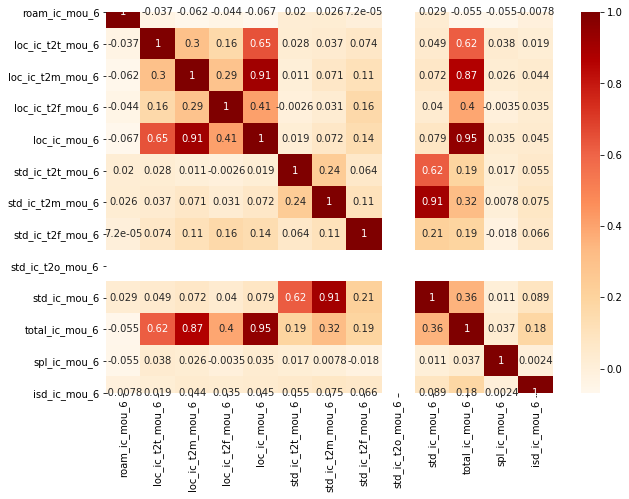

In [1900]:
heatmap(10,7,data_filtered.filter(mou_ic_cols6))

In [1901]:
print(data_filtered.loc[21,'total_ic_mou_6'],"==",data_filtered.loc[21,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())
print(data_filtered.loc[21,'loc_ic_mou_6'],"==",data_filtered.loc[21,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_t2c_mou_6']].sum())
print(data_filtered.loc[21,'std_ic_mou_6'],"==",data_filtered.loc[21,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2c_mou_6']].sum())

392.69 == 392.68999999999994
350.78 == 350.76
41.91 == 41.9


In [1902]:
list_total_ic_cols = data_filtered.columns[data_filtered.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
data_filtered.drop(list_total_ic_cols,axis=1,inplace=True)
print("Columns dropped - ")
list_total_ic_cols.tolist()

Columns dropped - 


['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

In [1903]:
data_filtered.drop('avg_amt_data_6_7',axis=1,inplace=True)

In [1904]:
col_list = data_filtered.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    data_filtered[avg_col_name] = (data_filtered[col_6]  + data_filtered[col_7])/ 2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
std_og_t2c_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
std_ic_t2o_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
count_rech_2g
count_rech_3g
av_rech_amt_data
vol_2g_mb
vol_3g_mb
arpu_3g
arpu_2g
night_pck_user
monthly_2g
sachet_2g
monthly_3g
sachet_3g
fb_user
vbc_3g
amt_data
days_since_recharge


In [1905]:
col_list_to_drop = data_filtered.filter(regex='_6|_7')
data_filtered.drop(col_list_to_drop,axis=1,inplace=True)
print (data_filtered.shape)

(26682, 102)


In [1906]:
# SPLITTING DATA SET

In [1907]:
# Putting feature variable to X
from sklearn.model_selection import train_test_split

X = data_filtered.drop(['churn_flag'],axis=1)

# Putting response variable to y
y = data_filtered['churn_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size=0.3, random_state=100)
print ("Shape of Train dataset",X_train.shape, y_train.shape)
print ("Shape of Test dataset",X_test.shape, y_test.shape)


Shape of Train dataset (18677, 101) (18677,)
Shape of Test dataset (8005, 101) (8005,)


In [1908]:
# TREATING CLASS IMBALANCE

In [1909]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
sm =  SMOTE(random_state = 27)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 


Before OverSampling, counts of label '1': 1870
Before OverSampling, counts of label '0': 16807 

After OverSampling, the shape of train_X: (33614, 101)
After OverSampling, the shape of train_y: (33614,) 

After OverSampling, counts of label '1': 16807
After OverSampling, counts of label '0': 16807


In [1910]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 

X_train_after_scaling = scaler.transform(X_train)
X_test_after_scaling = scaler.transform(X_test)

In [1911]:
logreg = LogisticRegression()

logreg.fit(X_train_after_scaling, y_train)

lr = LogisticRegression(solver = 'lbfgs')

In [1912]:
y_pred = logreg.predict(X_test_after_scaling)

In [1913]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [1914]:
y_pred.size

8005

In [1915]:
y_test

7533     0
26374    0
5745     1
6307     0
29940    1
        ..
12069    0
29304    0
12125    0
23030    0
5738     1
Name: churn_flag, Length: 8005, dtype: int32

In [1916]:
printingMSEandRsquare(y_test, y_pred)

0.1495315427857589
-0.5658004910169778


In [1917]:
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix_1)


[[6138 1011]
 [ 186  670]]


In [1918]:
y_pred_default = y_pred
printingConfusionMetricDetails(confusion_matrix_1)


Acuracy Score 0.8504684572142411
Sensitivity:  0.7827102803738317
Specificity:  0.858581619806966
false postive rate:  0.141418380193034
positive predictive value:  0.3985722784057109
Negative predictive value:  0.9705882352941176
Misclassification Rate:  0.1495315427857589


In [1919]:
x = X_train_after_scaling

In [1920]:
from sklearn.decomposition import PCA

In [1921]:
pca = PCA(random_state=42)

In [1922]:
pca.fit(x)

PCA(random_state=42)

In [1923]:
pca.components_

array([[-1.00554807e-19, -0.00000000e+00,  1.11022302e-16, ...,
         1.49524125e-01,  6.16859796e-02,  3.28804232e-02],
       [ 1.01670711e-18,  1.11022302e-16, -1.11022302e-16, ...,
        -5.00079532e-02,  2.13175715e-01, -1.14894894e-01],
       [-2.77748131e-19,  2.77555756e-17, -1.35308431e-16, ...,
        -5.05048835e-02, -5.81582082e-02, -1.33398980e-01],
       ...,
       [ 0.00000000e+00, -1.86713441e-01,  1.32875717e-01, ...,
         3.81639165e-17, -1.24997466e-02,  5.89805982e-17],
       [ 9.99999730e-01,  3.85880090e-05,  5.17471028e-04, ...,
         3.86247024e-19, -1.17017992e-04, -0.00000000e+00],
       [ 0.00000000e+00,  1.85746241e-01,  3.80109178e-02, ...,
        -1.45716772e-16,  4.04678918e-01,  1.00613962e-16]])

In [1924]:
pca.explained_variance_ratio_

array([1.60499855e-01, 8.54618783e-02, 6.42769173e-02, 5.35859997e-02,
       3.63234719e-02, 3.39763030e-02, 3.31791950e-02, 2.66861548e-02,
       2.59358198e-02, 2.30856250e-02, 2.14585773e-02, 2.11834985e-02,
       2.04311486e-02, 1.89838560e-02, 1.73517860e-02, 1.59640694e-02,
       1.55719231e-02, 1.42026851e-02, 1.39392463e-02, 1.28765636e-02,
       1.23038216e-02, 1.21328930e-02, 1.13918736e-02, 1.09511349e-02,
       1.05004906e-02, 1.04062020e-02, 1.01650408e-02, 9.60325604e-03,
       9.57931626e-03, 9.33407465e-03, 9.09224002e-03, 8.81637595e-03,
       8.25880895e-03, 8.10588621e-03, 7.80207734e-03, 7.50328908e-03,
       7.46395613e-03, 6.88871391e-03, 6.56271458e-03, 6.38398340e-03,
       6.02443914e-03, 5.78814532e-03, 5.64368180e-03, 5.53978180e-03,
       5.39739835e-03, 4.61148749e-03, 4.43807286e-03, 4.26430036e-03,
       4.06190333e-03, 3.83532817e-03, 3.76921983e-03, 3.67165501e-03,
       3.43766833e-03, 3.38753202e-03, 3.14102316e-03, 3.01483642e-03,
      

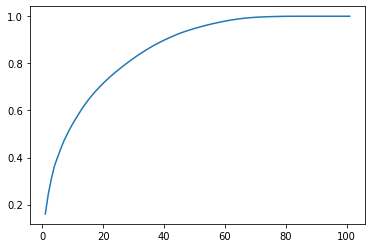

In [1925]:
import matplotlib.pyplot as plt
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [1926]:
from sklearn.decomposition import IncrementalPCA

pcaFinal = IncrementalPCA(n_components=70)
train_pca = pcaFinal.fit_transform(X_train_after_scaling)
train_pca.shape

(33614, 70)

In [1927]:
#Applying selected components to the test data - 70 components
test_pca = pcaFinal.fit_transform(X_test_after_scaling)
test_pca.shape 


(8005, 70)

In [1928]:
train_pca

array([[-1.02402139,  5.51316327, -1.13275052, ..., -0.07280639,
        -0.17947152, -0.20869183],
       [-2.24593588, -0.19621099, -0.68597497, ..., -0.10645215,
         0.08782773, -0.2986511 ],
       [-2.30477947,  0.70487734, -0.86235718, ..., -0.03421113,
        -0.18130863,  0.02489594],
       ...,
       [ 8.49068692, -4.76943756, -3.16261907, ...,  0.49340523,
        -0.39449792, -0.2021709 ],
       [-3.00889054, -2.36954657, -0.92225052, ...,  0.01262375,
        -0.01727464,  0.04829843],
       [-1.93828317, -1.169449  , -0.15810654, ..., -0.20256044,
         0.18573659,  0.06883738]])

In [1929]:
y_train.shape

(33614,)

In [1930]:
logreg = LogisticRegression()

logreg.fit(train_pca, y_train)

LogisticRegression()

In [1931]:
y_pred = logreg.predict(test_pca)


In [1932]:
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [1933]:
y_pred.size

8005

In [1934]:
y_test

7533     0
26374    0
5745     1
6307     0
29940    1
        ..
12069    0
29304    0
12125    0
23030    0
5738     1
Name: churn_flag, Length: 8005, dtype: int32

In [1935]:
printingMSEandRsquare(y_test, y_pred)

0.508682073703935
-4.32659949826327


In [1936]:
confusion_matrix2 = confusion_matrix(y_test, y_pred)
print(confusion_matrix2)
y_pred_default = y_pred

[[3309 3840]
 [ 232  624]]


In [1937]:
printingConfusionMetricDetails(confusion_matrix2)

Acuracy Score 0.49131792629606497
Sensitivity:  0.7289719626168224
Specificity:  0.4628619387326899
false postive rate:  0.5371380612673101
positive predictive value:  0.13978494623655913
Negative predictive value:  0.9344817848065519
Misclassification Rate:  0.508682073703935


In [1938]:
# Decision tree after Logistic regression

In [1939]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [1940]:
# Let's check the evaluation metrics of our default model
# Making predictions
y_pred_default = dt_default.predict(test_pca)

print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75      7149
           1       0.17      0.66      0.27       856

    accuracy                           0.63      8005
   macro avg       0.56      0.64      0.51      8005
weighted avg       0.86      0.63      0.70      8005

[[4444 2705]
 [ 292  564]]
Acuracy Score 0.6256089943785135


In [1941]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
printingConfusionMetricDetails(confusion_tree)

Acuracy Score 0.6256089943785135
Sensitivity:  0.6588785046728972
Specificity:  0.6216254021541474
false postive rate:  0.3783745978458526
positive predictive value:  0.1725298256347507
Negative predictive value:  0.9383445945945946
Misclassification Rate:  0.3743910056214866


In [1942]:
########## lets tune hyper parameters
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}


In [1943]:
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)


In [1944]:
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True,  n_jobs = -1)


In [1945]:
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(1, 40)},
             return_train_score=True, scoring='accuracy')

In [1946]:
y_train.shape

(33614,)

In [1947]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.586565      0.019152         0.009395        0.007306   
1       1.271572      0.092681         0.008595        0.005744   
2       1.612472      0.088516         0.010194        0.007905   
3       1.988257      0.020390         0.005796        0.000399   
4       2.392023      0.034018         0.008595        0.004269   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.695077           0.699093   
1               2  {'max_depth': 2}           0.719322           0.716942   
2               3  {'max_depth': 3}           0.745203           0.734791   
3               4  {'max_depth': 4}           0.761119           0.766920   
4               5  {'max_depth': 5}           0.779860           0.795181   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.694333           0.695374  ...         0.699263        0.006790   
1           0.715306           0.719470  ...         0.720533        0.005760   
2           0.748029           0.757102  ...         0.744957        0.007595   
3           0.763052           0.776439  ...         0.768579        0.006273   
4           0.786107           0.793842  ...         0.790564        0.006622   

   rank_test_score  split0_train_score  split1_train_score  \
0               39            0.702540            0.701499   
1               38            0.725038            0.725484   
2               37            0.755680            0.741103   
3               36            0.775501            0.770444   
4               35            0.796884            0.795991   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.701276            0.701796            0.696713   
1            0.719758            0.722435            0.716012   
2            0.758841            0.757131            0.742154   
3            0.776170            0.778141            0.771307   
4            0.798371            0.800714            0.796371   

   mean_train_score  std_train_score  
0          0.700765         0.002070  
1          0.721745         0.003525  
2          0.750982         0.007709  
3          0.774313         0.002950  
4          0.797666         0.001725  

[5 rows x 21 columns]

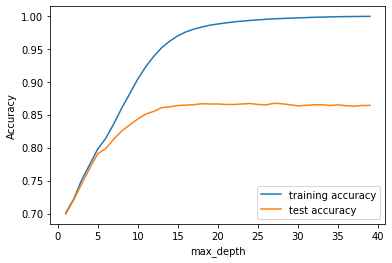

In [1948]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# seems 15 or 20 Max depth

In [1949]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True , n_jobs = -1)
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [1950]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.989732      0.505900         0.010395        0.006883   
1       4.975530      0.197315         0.006397        0.000490   
2       4.545980      0.207855         0.006397        0.000490   
3       4.241172      0.170226         0.008595        0.004221   
4       4.016928      0.143583         0.006196        0.000400   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.843373   
1                     25  {'min_samples_leaf': 25}           0.828499   
2                     45  {'min_samples_leaf': 45}           0.821211   
3                     65  {'min_samples_leaf': 65}           0.819575   
4                     85  {'min_samples_leaf': 85}           0.812286   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.857653           0.851108           0.855422  ...   
1           0.837721           0.826119           0.836531  ...   
2           0.834300           0.823442           0.829540  ...   
3           0.826714           0.820318           0.818682  ...   
4           0.821806           0.813030           0.819575  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.852562        0.005057                1            0.958388   
1         0.833849        0.005534                2            0.886207   
2         0.828107        0.005005                3            0.862110   
3         0.821086        0.002871                4            0.847198   
4         0.817368        0.003922                5            0.839798   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.958127            0.958313            0.956751   
1            0.883976            0.884906            0.887286   
2            0.863002            0.859842            0.861143   
3            0.847905            0.847235            0.845339   
4            0.838347            0.836376            0.838385   

   split4_train_score  mean_train_score  std_train_score  
0            0.959319          0.958180         0.000825  
1            0.885059          0.885487         0.001145  
2            0.859772          0.861174         0.001262  
3            0.846423          0.846820         0.000877  
4            0.839432          0.838468         0.001191  

[5 rows x 21 columns]

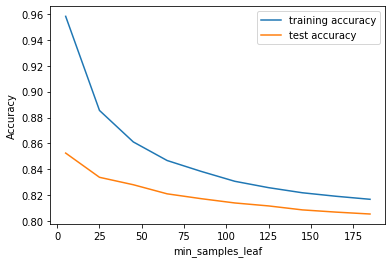

In [1951]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 5 to 75

In [1952]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True,  n_jobs = -1)
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [1953]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.256921      0.202038         0.008796    4.115897e-03   
1       7.206611      0.212761         0.006997    2.008385e-06   
2       7.143019      0.230881         0.006996    6.319573e-04   
3       7.042496      0.249077         0.006996    5.917394e-07   
4       6.985348      0.187535         0.006797    4.000188e-04   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.851257   
1                      25  {'min_samples_split': 25}           0.834449   
2                      45  {'min_samples_split': 45}           0.831028   
3                      65  {'min_samples_split': 65}           0.821954   
4                      85  {'min_samples_split': 85}           0.821062   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.863900           0.857802           0.866875  ...   
1           0.855719           0.844712           0.852447  ...   
2           0.839506           0.836978           0.846646  ...   
3           0.832664           0.830284           0.836383  ...   
4           0.834003           0.827458           0.833705  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.861814        0.006521                1            0.992934   
1         0.848813        0.008329                2            0.950467   
2         0.840602        0.006491                3            0.929010   
3         0.832719        0.006741                4            0.913614   
4         0.830428        0.005480                5            0.902421   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.993269            0.993083            0.993604   
1            0.952252            0.954632            0.951768   
2            0.925477            0.927411            0.927968   
3            0.909858            0.909896            0.909933   
4            0.899743            0.898330            0.898107   

   split4_train_score  mean_train_score  std_train_score  
0            0.993530          0.993284         0.000255  
1            0.948721          0.951568         0.001960  
2            0.925145          0.927002         0.001477  
3            0.908635          0.910387         0.001686  
4            0.895173          0.898755         0.002360  

[5 rows x 21 columns]

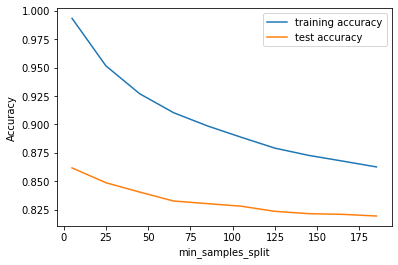

In [1954]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 25

In [1955]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(10, 20, 5),
    'min_samples_leaf': range(5, 75, 20),
    'min_samples_split': range(5, 75, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(train_pca,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  7.8min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(10, 20, 5),
                         'min_samples_leaf': range(5, 75, 20),
                         'min_samples_split': range(5, 75, 20)},
             refit='recall_score', verbose=1)

In [1956]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.415994      0.282226         0.006196        0.000399   
1       7.318311      0.252367         0.005796        0.000400   
2       7.282125      0.306479         0.006196        0.000399   
3       7.513518      0.204875         0.006197        0.000400   
4       7.007996      0.232781         0.006396        0.000489   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy              10                      5   
1         entropy              10                      5   
2         entropy              10                      5   
3         entropy              10                      5   
4         entropy              10                     25   

  param_min_samples_split                                             params  \
0                       5  {'criterion': 'entropy', 'max_depth': 10, 'min...   
1                      25  {'criterion': 'entropy', 'max_depth': 10, 'min...   
2                      45  {'criterion': 'entropy', 'max_depth': 10, 'min...   
3                      65  {'criterion': 'entropy', 'max_depth': 10, 'min...   
4                       5  {'criterion': 'entropy', 'max_depth': 10, 'min...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.820170           0.827012           0.831623           0.824632   
1           0.817046           0.825524           0.827755           0.820467   
2           0.814964           0.824186           0.823442           0.818385   
3           0.811840           0.823293           0.822103           0.817790   
4           0.816748           0.819872           0.818087           0.818385   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.826540         0.825995        0.003709               33  
1           0.824011         0.822961        0.003791               38  
2           0.822374         0.820670        0.003485               41  
3           0.821333         0.819272        0.004144               48  
4           0.819994         0.818617        0.001208               50

In [1957]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8548224258954116
DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=5, min_samples_split=5)


In [1958]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=15, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [1959]:
y_pred_default = clf_gini.predict(test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[5013, 2136],
       [ 438,  418]], dtype=int64)

In [1960]:
printingConfusionMetricDetails(confusion_tree_hyper)

Acuracy Score 0.6784509681449095
Sensitivity:  0.4883177570093458
Specificity:  0.7012169534200587
false postive rate:  0.29878304657994126
positive predictive value:  0.16366483946750196
Negative predictive value:  0.9196477710511832
Misclassification Rate:  0.3215490318550906


In [1961]:
# Random forest

# Importing random forest classifier from sklearn library
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(test_pca)

In [1962]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[6195,  954],
       [ 576,  280]], dtype=int64)

In [1963]:
printingConfusionMetricDetails(confusion_tree_hyper)

Acuracy Score 0.8088694565896315
Sensitivity:  0.4883177570093458
Specificity:  0.7012169534200587
false postive rate:  0.29878304657994126
positive predictive value:  0.16366483946750196
Negative predictive value:  0.9196477710511832
Misclassification Rate:  0.3215490318550906


In [1964]:
#Lets do some hyper parameter tuning  for RF

# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf_with_pca.fit(train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy')

In [1965]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.358696      0.096902         0.147716        0.012586   
1      24.018166      0.322022         0.157511        0.031008   
2      35.582151      0.554689         0.197887        0.011535   
3      41.110480      1.611171         0.192162        0.040059   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.766473           0.783430   
1               7   {'max_depth': 7}           0.838465           0.851554   
2              12  {'max_depth': 12}           0.912093           0.917894   
3              17  {'max_depth': 17}           0.936338           0.940949   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.774059           0.771233  ...         0.775213        0.006214   
1           0.850959           0.841291  ...         0.846790        0.005719   
2           0.911944           0.909862  ...         0.912596        0.002764   
3           0.936784           0.935445  ...         0.937288        0.001902   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.780447            0.781154   
1                3            0.866126            0.864416   
2                2            0.961102            0.961586   
3                1            0.985757            0.987914   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.779480            0.774051            0.774877   
1            0.861887            0.861701            0.863417   
2            0.959949            0.960991            0.961810   
3            0.986352            0.986464            0.986576   

   mean_train_score  std_train_score  
0          0.778002         0.002949  
1          0.863509         0.001648  
2          0.961088         0.000644  
3          0.986613         0.000709  

[4 rows x 21 columns]

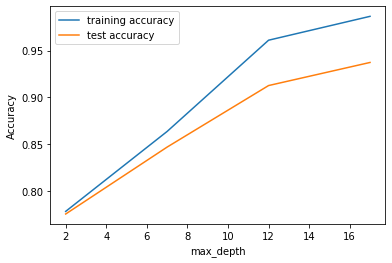

In [1966]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 11 to 13

In [ ]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, verbose = 1, return_train_score=True)
rf.fit(train_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal max_features
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True, verbose = 1)
rf.fit(train_pca, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 8 to 12

In [ ]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True, verbose = 1)
rf.fit(train_pca, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 100 to 150

In [ ]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True, n_jobs=-1, verbose = 1)
rf.fit(train_pca, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 200 to 300

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [11,13],
    'min_samples_leaf': range(100, 150, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(300, 600, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, n_jobs=-1, verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train_pca, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('Accuracy got is',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# model with the best hyperparameters

rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=13,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=400)

In [ ]:
rfc.fit(train_pca,y_train)

In [ ]:
# predict
y_pred_default = rfc.predict(test_pca)

In [ ]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

In [ ]:
printingConfusionMetricDetails(confusion_tree_hyper)

In [ ]:
# COMPARING MODELS

In [ ]:
#first logistic reg - accu - 86, Se - 76 , Spec - 86
# PCA - Logisc - acc-52, Sen - 66, Sepc - 50
# DT - first - Acc - 52, Sen -69 , Spec - 61
# DT - tuning - Acc - 62, Sen - 44, Spec - 63
# RF - - first - Acc  81, Sen - 48, Sepc - 70
# RF - post tuning - Acc - 67 Sen - 49, Sepc -70
# 
# RF seems to have hte highest Accuracy post PCA

In [ ]:
# let us use Logistic regression and  RF on full data set to get the important parameters

In [ ]:
# 1. Logistic Regression- Important Features

In [ ]:
logreg = LogisticRegression()

logreg.fit(X_train_after_scaling, y_train)

lr = LogisticRegression(solver = 'lbfgs')

In [ ]:
y_pred = logreg.predict(X_test_after_scaling)

In [ ]:
printingMSEandRsquare(y_test, y_pred)
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix_1)
y_pred_default = y_pred
printingConfusionMetricDetails(confusion_matrix_1)


In [ ]:
gridSearchForLR(lr,X_train_after_scaling,y_train)

In [ ]:
logreg_afterTuning=LogisticRegression(C=1000,penalty="l2")
logreg_afterTuning.fit(X_train_after_scaling, y_train)

In [ ]:
y_pred = logreg_afterTuning.predict(X_test_after_scaling)

In [ ]:
printingMSEandRsquare(y_test, y_pred)

In [ ]:
confusion_matrix_LR = confusion_matrix(y_test, y_pred)
print(confusion_matrix_LR)

In [ ]:
y_pred_default = y_pred
printingConfusionMetricDetails(confusion_matrix_1)

In [ ]:
#Printing importance table for Logistic Regression
importance = logreg_afterTuning.coef_[0]
impFeaturesforModels(importance)

In [ ]:
weights = pd.Series(importance,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [ ]:
# Random Forest with Best Hyper Parameters - important Features

In [ ]:
rfc_with_HyperParams = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=12,
                             n_estimators=200)

In [ ]:
rfc_with_HyperParams.fit(X_train_after_scaling,y_train)

In [ ]:
# predict
y_pred_default = rfc_with_HyperParams.predict(X_test_after_scaling)

In [ ]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

In [ ]:
printingConfusionMetricDetails(confusion_rf_hyper)

In [ ]:
#Printing importance table for Random Forest
importance = rfc_with_HyperParams.feature_importances_
impFeaturesforModels(importance)
# let us use RF on full data set to get the important parameters

In [ ]:
weights = pd.Series(importance,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [ ]:
#top parameters of LR
# 1) total_rech_data_8 2)count_rech_2g_8 3) count_rech_3g_8 4)std_og_t2m_mou_8 5)avg_std_og_t2t_mou_av67
# 6)amt_data_8 7)onnet_mou_8 8)avg_offnet_mou_av67 9) avg_arpu_2g_av67 10) avg_total_rech_num_av67

#top parameters for RF
#1)total_rech_amt_8 2) roam_og_mou_8 3) amt_data_8 4)loc_ic_t2m_mou_8 5)roam_ic_mou_8
#6)loc_og_t2m_mou_8 7)arpu_8 8)offnet_mou_8 9) last_day_rch_amt_8 10)loc_ic_t2t_mou_8

In [ ]:
# observations
# 1) Total rechargeable amount (and total rech data included there) for month 8 seems to be a strong indicator
# 2) Number of times customer recharges for 2g and 3g data are also strong indicators of Churn
# 3) Average revenue per user - dipping is a strong indicator of Churn
